# Midterm Exam - [sample] Solution Key

In [1]:
import re
import nltk
import time
import requests
import itertools
import pandas as pd
from scrapy.http import TextResponse
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from textblob import TextBlob, Word

## Problem 1
Info on gold prices is provided on https://b24.am/ .
- **Task 1 (10 points):** scrape the information provided on gold (probe, carat and price).
- **Task 2 (10 points):** calculate the price per 1k (one carat).
- **Task 3 (5 points):** calculate how many probes is 1k.

In [2]:
url_1 = 'https://b24.am/'
page_1 = requests.get(url_1,timeout=10)
response_1 = TextResponse(url=page_1.url,body=page_1.text,encoding="utf-8")

In [3]:
gold_div = response_1.css("div[class='left_box material_block']")[3]

In [4]:
probe=[float(i) for i in gold_div.css(".box_nm::text").re("\d+")]
carat=[float(i) for i in gold_div.css(".box_pr::text").re("\d+")]
price=[float(i.replace(",","").strip()) for i in gold_div.css(".box_cng::text").extract()]

In [5]:
data=pd.DataFrame({"probe":probe,"carat":carat,"price":price})
print(data)

   probe  carat     price
0  999.0   24.0  21670.28
1  958.0   23.0  20767.35
2  916.0   22.0  19864.42
3  720.0   18.0  16252.71
4  625.0   15.0  13543.93
5  585.0   14.0  12641.00
6  500.0   12.0  10835.14
7  417.0   10.0   9029.28
8  375.0    9.0   8126.36


In [6]:
#price per carat
print(data.price[0]/data.carat[0])

902.9283333333333


In [7]:
#price per probe
print(data.price[0]/data.probe[0])

21.69197197197197


In [8]:
#probe per carat
print(data.probe[0]/data.carat[0])

41.625


## Problem 2
Info on administrative divisions of RA is provided on https://en.wikipedia.org/wiki/Armenia .<br>
- **Task 1 (10 points):** scrape the names, areas and population info per region.
- **Task 2 (5 points):** calculate the density (population per km 2 ) per region.
- **Task 3 (5 points):** what is the average density in regions (excluding Yerevan)?.
- **Task 4 (5 points):** what is the average population in regions (excluding Yerevan)?

In [9]:
#getting all tables in list
table_list=pd.read_html("https://en.wikipedia.org/wiki/Armenia")
print(len(table_list))

39


In [10]:
## to identify which one is the wanted list let's use for loop
for i in table_list:
    print(i.head(2),"\n\n")

  Republic of ArmeniaՀայաստանի ՀանրապետությունHayastani Hanrapetut’yun (Armenian)  \
0                                 Flag  Coat of arms                                
1   Anthem: Մեր ՀայրենիքMer Hayrenik"Our Fatherland"                                

  Republic of ArmeniaՀայաստանի ՀանրապետությունHayastani Hanrapetut’yun (Armenian).1  
0                                 Flag  Coat of arms                                 
1   Anthem: Մեր ՀայրենիքMer Hayrenik"Our Fatherland"                                  


    0                                                  1
0 NaN  This section needs additional citations for ve... 


     Province Province.1   Capital Capital.1  Area (km²)  Population †
0  Aragatsotn  Արագածոտն  Ashtarak   Աշտարակ        2756        132925
1      Ararat     Արարատ  Artashat   Արտաշատ        2090        260367 


  vte Largest cities or towns in ArmeniaArmenia 2011 census[161][162][163][164][165][166][167][168][169][170][171]  \
                                

In [11]:
## the one we are looking for is the 3th one
table=table_list[2]
print(table.head())

      Province   Province.1   Capital Capital.1  Area (km²)  Population †
0   Aragatsotn    Արագածոտն  Ashtarak   Աշտարակ        2756        132925
1       Ararat       Արարատ  Artashat   Արտաշատ        2090        260367
2      Armavir      Արմավիր   Armavir   Արմավիր        1242        265770
3  Gegharkunik  Գեղարքունիք     Gavar     Գավառ        5349        235075
4       Kotayk       Կոտայք   Hrazdan   Հրազդան        2086        254397


In [12]:
# the density (population per km 2 ) per region.
table["density_calc"]=table['Population †']/table['Area (km²)'] ##creating new column
print(table.head())

      Province   Province.1   Capital Capital.1  Area (km²)  Population †  \
0   Aragatsotn    Արագածոտն  Ashtarak   Աշտարակ        2756        132925   
1       Ararat       Արարատ  Artashat   Արտաշատ        2090        260367   
2      Armavir      Արմավիր   Armavir   Արմավիր        1242        265770   
3  Gegharkunik  Գեղարքունիք     Gavar     Գավառ        5349        235075   
4       Kotayk       Կոտայք   Hrazdan   Հրազդան        2086        254397   

   density_calc  
0     48.231132  
1    124.577512  
2    213.985507  
3     43.947467  
4    121.954458  


In [13]:
#the average density in regions (excluding Yerevan).
print(table[table.Province!="Yerevan"]["density_calc"].mean())

81.03995759369994


In [14]:
#the average population in regions (excluding Yerevan).
print(table[table.Province!="Yerevan"]["Population †"].mean())

195871.6


## Problem 3
The list of top economists is provided on https://ideas.repec.org/top/top.person.all.html .<br>
- **Task 1 (10 points):** scrape the rankings (at least author name and score).<br>
- **Task 2 (5 points):** what is the median score for all economists in the list?<br>
- **Task 3 (5 points):** how many economists have a score lower than the average?<br>
- **Task 4 (5 points):** what is the score for Ian Peter Preston?

In [15]:
## as the data is in the table we can use pandas
url='https://ideas.repec.org/top/top.person.all.html'
list_of_tables=pd.read_html(url)

In [16]:
## to identify which one is the wanted list let's use for loop
for i in range(len(list_of_tables)):
    print("Table: ",i)
    print(list_of_tables[i].head(2),"\n\n")

Table:  0
        0             1             2              3              4   \
0   Entity  Full ranking  Full ranking  Last 10 years  Last 10 years   
1  Authors         Short       Details          Short        Details   

                5                6                               7   \
0  10 best authors  10 best authors  Last 10 years, 10 best authors   
1              NaN              NaN                             NaN   

                               8               9               10    11  
0  Last 10 years, 10 best authors  Top 5% authors  Top 5% authors  More  
1                             NaN             NaN             NaN  More   


Table:  1
   Rank                                             Author  Score
0     1  Andrei Shleifer Department of Economics, Harva...   3.38
1     2  James J. Heckman Department of Economics, Univ...   4.11 




In [17]:
## the table we want is the second in the list
data=list_of_tables[1]
print(data.head())

   Rank                                             Author  Score
0     1  Andrei Shleifer Department of Economics, Harva...   3.38
1     2  James J. Heckman Department of Economics, Univ...   4.11
2     3  Daron Acemoglu Economics Department, Massachus...   5.22
3     4  Joseph E. Stiglitz Finance and Economics Depar...   5.89
4     5  Robert J. Barro Department of Economics, Harva...   6.11


In [18]:
#the median score for all economists in the list?
print(data.Score.median())

1503.4099999999999


In [19]:
#Number of economists that have a score lower than the average
print(data[data.Score<data.Score.mean()].shape) 
#there are 1397

(1397, 3)


In [20]:
#the score for Ian Peter Preston
print(data[data.Author.str.contains("Peter Preston")]["Score"])

1368    1456.93
Name: Score, dtype: float64


## Problem 4
The list of drinkings is provided on https://buy.am/en/food-court/fresh-coffee-tea-ice-cream/
- **Task 1 (10 points):** scrape all prices and product names<br>
- **Task 2 (5 points):** calculate average price of products that have "Fresh" inside, then the same for "Smoothie" and "Cappuccino"
- **Task 3 (10 points):** get top 10 most frequent words in product names then remove general category names if they appear in top 10 afterwards plot top 40 most frequent words.

In [21]:
# after inspecting the website it is clear that we need selenium for this task
url="https://buy.am/en/food-court/fresh-coffee-tea-ice-cream/"
browser=webdriver.Chrome()
browser.get(url)

In [22]:
while True:
    old_length = len(browser.page_source)
    some_element = browser.find_element_by_tag_name("html")
    time.sleep(5)
    some_element.send_keys(Keys.END)
    time.sleep(5)
    new_length = len(browser.page_source)
    print(new_length)
    if new_length==old_length:
        break

655262
957716
1239981
1278569
1347121
1447286
1510414
1580397
1625241
1811434
1819602
1819602


In [23]:
names=[i.text for i in browser.find_elements_by_class_name("product--title")]

In [24]:
#checking length
print(len(names))
print(names[:4])

296
['Smoothie Orange N24', 'Smoothie Grapefruit N25', 'Smoothie Lemon N26', 'Smoothie Lime N27']


In [25]:
## note the following part you can do part by part. we just clean and get only numbers by float format.
prices=[float(re.findall("\d+",i.text.replace(",",""))[0]) for i in browser.find_elements_by_class_name("product--price")]

In [26]:
#checking length
print(len(prices))
print(prices[:4])

296
[700.0, 750.0, 600.0, 1100.0]


In [27]:
##making dataframe
data=pd.DataFrame({"Product_name":names,"Price":prices})
print(data.head())

              Product_name   Price
0      Smoothie Orange N24   700.0
1  Smoothie Grapefruit N25   750.0
2       Smoothie Lemon N26   600.0
3        Smoothie Lime N27  1100.0
4        Smoothie Kiwi N28   800.0


In [28]:
# the average price of products that have "Fresh" inside

print(data[data["Product_name"].str.contains("Fresh")]["Price"].mean())

1850.0


In [29]:
# the average price of products that have "Smoothie" inside
print(data[data["Product_name"].str.contains("Smoothie")]["Price"].mean())

1239.344262295082


In [30]:
# the average price of products that have "Cappuccino" inside
print(data[data["Product_name"].str.contains("Cappuccino")]["Price"].mean())

2170.8333333333335


There are several approaches to solve the last task.

In [31]:
names=[TextBlob(i).words for i in names]
print(names[:5])

[WordList(['Smoothie', 'Orange', 'N24']), WordList(['Smoothie', 'Grapefruit', 'N25']), WordList(['Smoothie', 'Lemon', 'N26']), WordList(['Smoothie', 'Lime', 'N27']), WordList(['Smoothie', 'Kiwi', 'N28'])]


In [32]:
##we need all words to be inside one list so we use itertools
merged = list(itertools.chain(*names)) 

In [33]:
freq_dict=nltk.FreqDist(merged)
print(freq_dict.most_common()[:10])

[('Smoothie', 61), ('tea', 37), ('Coffee', 29), ('0.5', 28), ('l', 28), ('Ice', 27), ('«', 26), ('»', 26), ('Americano', 25), ('Espresso', 24)]


In [35]:
##creating list containing most common words
most_common=[]
for i in freq_dict.most_common()[:10]:
    most_common.append(i[0])

In [36]:
 ##removing top 10 frequent words
words=[i.lower() for i in merged if  i not in most_common and len(i)>2]

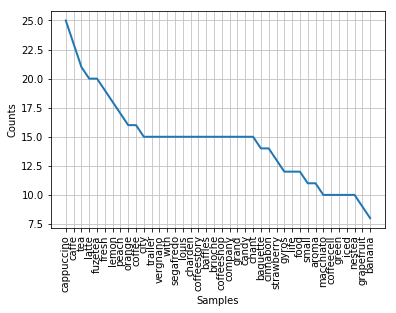

In [38]:
##plotting most top 40 words after cleaning top 10
nltk.FreqDist(words).plot(40)